<a href="https://colab.research.google.com/github/oscarfdezmora/EOI_Master_DSc/blob/main/NLP%20-%20Actividad_2_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Captura%20de%20pantalla%202021-02-18%20a%20las%2012.20.21.png](attachment:Captura%20de%20pantalla%202021-02-18%20a%20las%2012.20.21.png)

# Instrucciones

En esta actividad seguiremos trabajando con el corpus de opiniones de la SFU (https://www.sfu.ca/~mtaboada/SFU_Review_Corpus.html). A modo de recordatorio, esta colección consta de 400 artículos de opinión extraídos del sitio web Epinions y etiquetados con polaridad positiva o negativa. Exactamente, 200 tienen polaridad positiva y 200 tienen polaridad negativa. 

* La columna "target" es la polaridad asignada a la opinión: 0 significa polaridad negativa y 1 polaridad positiva.
* La columna 'text' incluye el contenido del artículo de opinión en texto libre.

La coincidencia exacta en el número de ejemplos de cada clase no es una coincidencia. La intención es tener un conjunto de datos equilibrado. Eso no refleja las distribuciones reales de las clases positivas y negativas en los artículos de opinión sino que se trabaja así porque los conjuntos de datos equilibrados simplifican el diseño de la mayoría de los métodos computacionales que se requieren para el análisis de sentimientos. Sin embargo, es mejor ser consciente de que este equilibrio de clases es artificial. 

**El objetivo de esta actividad es familiarizarse con las técnicas básicas de extracción de características del texto y resolver una tarea de PLN completa. Para ello, se debe crear el código necesario que se indica en las celdas vacías. Cuando sea posible, también se proporciona la salida esperada.**

## Imports

In [1]:
import numpy as np                         # Librería para el álgebra lineal y matemáticas
import pandas as pd                        # Librería Dataframe 

import matplotlib.pyplot as plt            # Librería para gráficas 
import re                                  # Librería para expresiones regulares
import string                              # Librería para operaciones con strings

import nltk                                # Librería de preprocesamiento de texto
from nltk.corpus import stopwords          # Módulo de stop words que se incluye en NLTK
from nltk.stem import PorterStemmer        # Módulo para stemming

import random                              # Librería para generar números semialeatorios

# La salida de los comandos de visualización gráfica se muestran directamente debajo de la celda de código 
# en la que se especifican
%matplotlib inline                         

## Obtener los datos

**1. Lee el fichero SFU_Review_Corpus.csv y cárgalo en una estructura de tipo Dataframe llamada 'sfu'.**

In [2]:
## Habilitamos la lectura desde Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Definimos nuestra ruta de trabajo
dir = '/content/drive/MyDrive/Máster EOI/Semana 12 - PLN/'

## Leemos los datos del fichero origen
sfu = pd.read_csv(dir + 'SFU_Review_Corpus.csv')
sfu

,text,target
0,Let me start off this review by first stating ...,0
1,The Imac is horrible. Sure it looks nice but w...,0
2,I was so excited when I was given an iMac for ...,0
3,I was going to purchase one of the new $1199 m...,0
4,Although I do not personaly own one of these m...,0
...,...,...
395,"Now, to bring up a few important points about ...",0
396,"Two weeks ago, I spent several days behind the...",0
397,I rented a PT Cruiser for a weekend trip from ...,0
398,"You know youre in trouble when, after driving...",0


## Análisis exploratorio de los datos (EDA)

Antes de nada, podemos imprimir un par de opiniones del conjunto de datos para ver su aspecto. Un buen entendimiento de los datos es responsable del 80% del éxito o el fracaso en los proyectos de ciencia de datos. Podemos aprovechar este momento para observar aspectos que nos gustaría tener en cuenta al preprocesar nuestros datos.

Vamos a imprimir una opinión positiva y otra negativa al azar. Hemos añadido una marca de color al principio de cada string para distinguir mejor las dos.

>*Ten en cuenta que como estamos obteniendo una opinión aleatoria, la salida podría ser diferente a la que se muestra al ejecutar las celdas que aparecen a continuación.*

In [5]:
# Mostrar la opinión negativa en verde
print(f"\033[92m {sfu[sfu['target']==0]['text'].iloc[random.randint(0,200)]}")

 I enjoyed reading Dean Koontz's book "Tick Tock" very much. What I didn't enjoy doing, however, was listening to this book on audiocassette. I had never before listened to a book on tape, so this was a first. Just because I give my opinion of this book on audiocassette a bad review, it does not mean I'm bashing audiocassette books in general. I'm sure this book on tape has got to be one of the worse. I listened to the taped version a week after finishing the book, so the book was still fresh in my mind.  
 
The person who read the book complete stripped the personality out of the characters by his interpretations of the voices. As I read the book, I got the impression of the main female character to be smart, clever, fun and sporadic. The reader, however, made the female's voice whiny and obviously fake. His reading of the book put it into a whole new perspective, and not a likeable one either. He instead made the whole book sound ridiculous.  
 
I am a very big fan of Dean Koontz boo

Salida esperada: 

![Captura%20de%20pantalla%202021-01-28%20a%20las%2012.30.31.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2012.30.31.png)

In [6]:
# Opinión positiva en rojo
print(f"\033[91m {sfu[sfu['target']==1]['text'].iloc[random.randint(0,200)]}")

 Plot Details: This opinion reveals major details about the movie's plot.  
I just want to be upfront on the following.  
 
I still haven't forgiven Tom for what he did to Nicole. To dump your wife through a divorce petition is pretty sleazy. What's even sleazier is to abandon her while she's pregnant with your child and then try to say that the marriage was only enforce for 9 years 11 months so that you could skirt the 10 year California rule on split of assets.  
 
It's sleazy.  
 
Now that I've gotten that out of the way, let's talk about my strong like for Tom Cruise, the actor. I've always had a soft spot for the lovable creature that he is and by the time he made Top Gun, I was swearing my undying devotion to him. I don't think that he's a particularly gifted actor however, like Britney Spears, he is the consummate entertainer. I doubt that he'll ever win an Oscar for Best Actor. Why? In the end, I think that his looks are what sabotage him. The best thing that could happen to hi

Salida esperada:

![Captura%20de%20pantalla%202021-01-28%20a%20las%2012.31.42.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2012.31.42.png)

Ahora, revisemos algunas de las estadísticas.

In [7]:
sfu.head()

,text,target
0,Let me start off this review by first stating ...,0
1,The Imac is horrible. Sure it looks nice but w...,0
2,I was so excited when I was given an iMac for ...,0
3,I was going to purchase one of the new $1199 m...,0
4,Although I do not personaly own one of these m...,0


In [8]:
sfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    400 non-null    object
 1   target  400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [9]:
sfu.describe()

,target
count,400.000000
mean,0.500000
std,0.500626
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


A medida que avanzamos en nuestro análisis, tenemos que empezar a pensar en las características que vamos a utilizar. Esto está relacionado con la idea general de la extracción de características. Cuanto mejor sea nuestro conocimiento del dominio de los datos, mejor será nuestra capacidad para diseñar más características a partir de ellos.

**2. Crea una nueva columna denominada 'text_length' que represente la longitud en número de caracteres de los artículos de opinión y visualiza la cabecera del dataframe de nuevo.**

SUGERENCIA: 
Puedes usar la función 'len'.

In [10]:
sfu['text_length'] = sfu['text'].str.len()

In [11]:
sfu.head()

,text,target,text_length
0,Let me start off this review by first stating ...,0,2966
1,The Imac is horrible. Sure it looks nice but w...,0,3744
2,I was so excited when I was given an iMac for ...,0,1512
3,I was going to purchase one of the new $1199 m...,0,1231
4,Although I do not personaly own one of these m...,0,1252


Salida esperada:

![Captura%20de%20pantalla%202021-01-28%20a%20las%2012.34.10.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2012.34.10.png)

### Visualización de los datos

Visualicemos los datos!

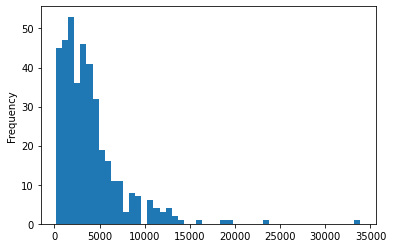

In [12]:
sfu['text_length'].plot(bins=50, kind='hist') 

Parece que existe una opinión realmente larga.

In [13]:
sfu['text_length'].describe()

count      400.000000
mean      3940.862500
std       3553.954689
min        186.000000
25%       1635.500000
50%       3199.500000
75%       4906.000000
max      33886.000000
Name: text_length, dtype: float64

In [14]:
print(sfu[sfu['text_length'] == 33886]['text'].iloc[0])

Why was I so drawn to the iMac? You see, for the last 11 years I have been using Microsoft Windows-based machines. Each version of Windows has been getting better, and XP in particular is quite good. In fact, going into this purchase, I was quite happy with XP.  
 
Still, roaming the aisles of CompUSA I felt myself being drawn to the iMac. For a few reasons actually. First, I had continually heard that the Mac made it super easy to manage digital photos and create movies. Second, I found the design of the iMac very appealing. I still use a Windows machine for work, so I figured I would take a chance and buy an iMac to replace my Micron PC at home - and I haven't looked back since.  
 
INITIAL CONCERNS  
 
Prior to the purchase, I did a bit of research to ensure I wouldn't be making a big mistake. My home computer had been used primarily for managing photos, creating and editing Microsoft Office documents, videoconferencing (using Messenger in XP), and surfing the net. With the iMac, I 

Intentemos ver si la longitud del texto es un rasgo distintivo entre las opiniones positivas y las negativas:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1a577110>,
      dtype=object)

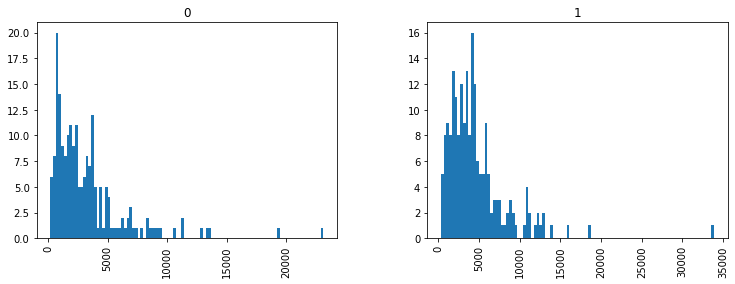

In [15]:
sfu.hist(column='text_length', by='target', bins=100,figsize=(12,4))

A través de un EDA básico hemos visto que no hay mucha diferencia en la longitud en caracteres entre las opiniones de una y otra polaridad, por lo que parece que no es una característica que nos permita discriminar correctamente las opiniones.

¡Ahora vamos a empezar a procesar los datos para poder utilizarlos finalmente con Scikit-learn!


## Preprocesamiento del texto

Como ya hemos aprendido, el preprocesamiento de datos es uno de los pasos críticos en cualquier proyecto de aprendizaje automático. Incluye la limpieza y el formateo de los datos antes de introducirlos en un algoritmo de aprendizaje automático. En el caso del PLN, algunos de los pasos más comunes de preprocesamiento son los siguientes:

  * Tokenización
  * Eliminación de las palabras vacías y de los signos de puntuación
  * Stemming

La función que se muestra a continuación implementa todos estos pasos. Básicamente:
* Tokenizar significa dividir las cadenas de texto en tokens individuales sin espacios en blanco ni tabulaciones. En este mismo paso, también podemos convertir cada token de la cadena a minúsculas. El módulo tokenize de NLTK nos permite hacer esto fácilmente.
* El stemming es el proceso de convertir una palabra en su forma más general, o stem. Esto ayuda a reducir el tamaño de nuestro vocabulario. 
    Consideremos las palabras

    **learn**
    
    **learn**ing
    
    **learn**ed
    
    **learn**t
    
    Todas estas palabras proceden de su raíz común **learn**. Sin embargo, en algunos casos, el proceso de derivación produce palabras que no son ortográficamente correctas de la palabra raíz. Por ejemplo, **happi** y **sunni**. Esto se debe a que el algoritmo elige la raíz más común para las palabras relacionadas. Por ejemplo, podemos ver el conjunto de palabras que comprende las diferentes formas de **happy**:

    **happ**y
    
    **happi**ness
    
    **happi**er

    Podemos ver que el prefijo **happi** es el más utilizado. No podemos elegir **happ** porque es la raíz de palabras no relacionadas como **happen**.

    NLTK dispone de diferentes módulos para el stemming y nosotros utilizaremos el módulo PorterStemmer que implementa el Algoritmo Porter Stemming (https://tartarus.org/martin/PorterStemmer/).


* Podemos ver que la lista de stop words de abajo contiene algunas palabras que podrían ser importantes en algunos contextos. Podrían ser palabras como *i*, *not*, *between*, *because*, *won*, *against*. Es posible que se tenga que personalizar la lista de stop words para algunas aplicaciones. Para nuestro ejercicio, utilizaremos la lista completa.

* En cuanto a la puntuación, algunas agrupaciones como *:)* y *...* deben conservarse cuando se trata, por ejemplo, de tweets porque se utilizan para expresar emociones. En otros contextos, como el análisis médico, deben eliminarse. En nuestro ejercicio, vamos a eliminarlos.

In [16]:
!pip install --user -U nltk
import nltk

nltk.download()

     |████████████████████████████████| 1.4MB 5.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434670 sha256=cb10eaf46cca64adf21db8a7e30125c60ade2a50aafed4621b3b5787de8f2ad7
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [17]:
# mostrar la lista de stopwords en inglés de NLTK
print('Stop words\n')
print(stopwords.words('english'))

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [18]:
def normalize_opinion(text):
    # Importar la lista de stopwords de NLTK en inglés
    stop_words = set(stopwords.words('english'))
    
    # Instanciar el objeto 
    stemmer = PorterStemmer() 
    
    filtered_text = []

    # Tokenización, convertir en minúsculas, eliminar las stop words, puntuación y obtener la raíz
    filtered_text = [stemmer.stem(w.lower()) for w in nltk.word_tokenize(text) if 
                         w not in string.punctuation and
                         w.lower() not in stop_words]  
    
    # Devolver la lista de tokens convertidos en un string   
    return  ' '.join(filtered_text)

Probemos cómo funciona esta función en una opinión concreta:

In [19]:
print(f"\033[34mOriginal text: \033[30m{sfu['text'].iloc[2]}")

Original text: I was so excited when I was given an iMac for my birthday last year, especially since it is aqua blue. However, I have found lots of flaws with this computer. First of all, it doesn't have a disk drive (the hard square disks), you have to buy that seperately (which runs about 100$!). I couldn't transfer any files from my old computer onto my new iMac without buying extra stuff! I was also not happy with the DVD player, it isn't fast enough to keep up with the DVD itself! The actors lines will go in and out of being dubbed correctly. It is only a slight problem, but it really aggravates me to the point that I have only watched one DVE on it. Not only that, this computer has frequent crashes (about once every week or so). That is a problem in itself, but to make matters worse there is no set of keys that you can press to restart the computer. You have to hold down the power button for about ten seconds for the computer to turn off. A few times even that hasn't worked and I

In [20]:
print(f"\033[34mNormalized opinion: \033[30m{normalize_opinion(sfu['text'].iloc[2])}")

Normalized opinion: excit given imac birthday last year especi sinc aqua blue howev found lot flaw comput first n't disk drive hard squar disk buy seper run 100 could n't transfer file old comput onto new imac without buy extra stuff also happi dvd player n't fast enough keep dvd actor line go dub correctli slight problem realli aggrav point watch one dve comput frequent crash everi week problem make matter wors set key press restart comput hold power button ten second comput turn time even n't work actual unplug comput howev comput lot memori pretti quick good n't constantli import export thing comput tech support help ... howev way mani friend consid suppos reliabl comput overal would n't suggest comput espcial sinc world run pc 's load file unless mac format ... frustrat


**3. Crea una nueva columna en el dataframe llamada 'normalized_text' resultante de aplicar la función 'normalize_opinion' en la columna 'text' y visualiza el dataframe.** 


SUGERENCIA: Una forma de resolver esto es utilizar la función 'apply'. 

*Puede llevar un tiempo procesar todo el dataframe y aplicar la función.*

In [21]:
sfu['normalized_text'] = sfu['text'].apply(normalize_opinion)

In [22]:
sfu.head()

,text,target,text_length,normalized_text
0,Let me start off this review by first stating ...,0,2966,let start review first state imacdv 1999 model...
1,The Imac is horrible. Sure it looks nice but w...,0,3744,imac horribl sure look nice talk comput offic ...
2,I was so excited when I was given an iMac for ...,0,1512,excit given imac birthday last year especi sin...
3,I was going to purchase one of the new $1199 m...,0,1231,go purchas one new 1199 mid-rang imac 19 month...
4,Although I do not personaly own one of these m...,0,1252,although personali one monster work one everi ...


Salida esperada:

![Captura%20de%20pantalla%202021-01-28%20a%20las%2012.44.12.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2012.44.12.png)

Comprobemos que tras la limpieza y normalización del texto no hay opiniones vacías.

In [23]:
sfu.isnull().sum()

text               0
target             0
text_length        0
normalized_text    0
dtype: int64

## Tarea de clasificación NLP

## Train Test Split

Una forma adecuada es dividir los datos en un conjunto de training/test, en el que el modelo sólo ve los datos de entrenamiento durante el ajuste del modelo y el tuneado de los parámetros. Los datos de test no se utilizan en ningún caso. De este modo, nuestra evaluación final sobre los datos de test es representativa del verdadero rendimiento predictivo.

Utilizamos train_test_split para dividir los datos en X_train, X_test, y_train, y_test, con test_size=0.3 y random_state=42.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(sfu['normalized_text'], sfu['target'] ,test_size=0.3,random_state=42)

In [26]:
print(f"\033[34mFirst example in the train set: \033[30m{X_train.iloc[0]}")
print(X_train.iloc[0])
print(f"\033[34mPolarity: \033[30m{y_train.iloc[0]}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

First example in the train set: went calphalon hard-anod cookwar year back pot look great seem say `` owner pot class '' howev use went back less-expens non-stick cookwar job calphalon pot heavi hard clean ca n't put dishwash -- 'll get white spot tri one small piec howev heavi aluminum work better purpos exampl use calphalon 'm sear fish -- need get pan hot first oliv oil 'm use ensur fish wo n't stick handl metal heat pot need pothold lift one pot stove ... 'm alway unsur grip use pothold lift pan bubbl oil stove quick omelet morn reach budg non-stick special dish reqir hot smooth evenli heat surfac use calphalon
went calphalon hard-anod cookwar year back pot look great seem say `` owner pot class '' howev use went back less-expens non-stick cookwar job calphalon pot heavi hard clean ca n't put dishwash -- 'll get white spot tri one small piec howev heavi aluminum work better purpos exampl use calphalon 'm sear fish -- need get pan hot first oliv oil 'm use ensur fish wo n't stick ha

## Extracción de catacterísticas (Vectorización)

## A. Bag-of-Words (BoW)

Actualmente, tenemos las opiniones como un conjunto de tokens (stems) y ahora necesitamos convertir cada una de esas opiniones en un vector con el que puedan trabajar los modelos de Scikit-learn.

Lo haremos siguiendo el modelo bag-of-words en el que cada vector tendrá tantas dimensiones como palabras únicas haya en el corpus de opiniones. Primero, utilizaremos el **CountVectorizer** de Scikit-learn. Este modelo convertirá una colección de documentos de texto en una matriz de recuento de tokens.

Podemos imaginarlo como una matriz bidimensional en la que la primera dimensión son los documentos reales (1 fila por documento) y la otra dimensión es todo el vocabulario (1 columna por token). 

Por ejemplo:

<table border = “1“>
<tr>
<th></th> <th>Frecuencia Token 1</th> <th>Frecuencia Token 2</th> <th>...</th> <th>Frecuencia Token N</th> 
</tr>
<tr>
<td><b>Opinión 1</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Opinión 2</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Opinión N</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

Como hay tantas opiniones, podemos esperar muchas frecuencias a cero para la presencia de cada token en un documento concreto. Debido a esto, Scikit-learn producirá una [matriz dispersa] (https://en.wikipedia.org/wiki/Sparse_matrix).

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Hay muchos argumentos y parámetros que se pueden pasar al CountVectorizer 
# En este caso, como tenemos el texto ya normalizado no pasaremos ningún argumento
bow_transformer = CountVectorizer()

Vamos a generar el vocabulario a partir de los datos de entrenamiento.

In [29]:
bow_transformer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Podemos ver el número de tokens diferentes en el diccionario y los propios tokens.

In [30]:
print(f'Hay {len(bow_transformer.get_feature_names())} tokens en el vocabulario:')
print(bow_transformer.get_feature_names())

Hay 10452 tokens en el vocabulario:
['00', '000', '007', '00pm', '01', '02', '024', '0271', '0273', '0298', '03', '033', '0359', '0380', '0395', '04', '0409', '0412', '0441', '0462', '05', '0547', '0551', '0555', '06ghz', '0735', '0917', '0984', '0gb', '0ghz', '0in', '0l', '0t213e6fmay', '10', '100', '1000', '10000', '100base', '100m', '100mhz', '100x', '1024', '104', '106th', '10base', '10gb', '10k', '10pm', '10th', '10x', '11', '110', '1185', '11b', '11g', '11th', '12', '120', '1200', '1200nf', '120gig', '120mb', '125', '128', '128mb', '1299', '12a', '12th', '12x', '13', '130', '1300', '130w', '1313', '133', '135', '1394', '14', '140', '1400', '144', '1440x900', '145lb', '147', '1493', '15', '150', '1500', '155', '15mph', '16', '160', '1600', '1600x1200', '160gb', '165', '1656', '166', '168', '169', '16k', '16x', '16x9', '17', '170', '1700', '1703fp', '171', '17120', '172', '1743', '175', '1799', '17in', '18', '180', '180w', '181', '1814', '1818', '185', '186', '187', '1870', '1876',

Tomemos una opinión y obtengamos su bag-of-words como un vector, haciendo uso de `bow_transformer`:

In [31]:
opinion5 = X_train.iloc[5]
print(opinion5)

buy spoon look decent product ye spoon modestli price qualiti highli lack first impress `` hell '' upon inspect spoon appear cheap type `` pot metal '' stamp finish spoon flat unpolish grey color part spoon even remot shini head spoon look like big machin stamp poor enslav chines 12 year old forc quickli unevenli polish part spoon put mouth evidenc spoon nice `` made china '' sticker howev spoon bottom unevenli stamp word `` stainless steel '' indic actual stainless steel honest think stamp make believ stainless steel keep immedi demand refund


Ahora vamos a ver su representación vectorial. Para ello, utilizamos la función `transform`.

In [32]:
bow5 = bow_transformer.transform([opinion5])
print(bow5)
print(bow5.shape)

  (0, 56)	1
  (0, 582)	1
  (0, 860)	1
  (0, 1215)	1
  (0, 1269)	1
  (0, 1435)	1
  (0, 1624)	1
  (0, 1868)	1
  (0, 1916)	1
  (0, 1917)	1
  (0, 2107)	1
  (0, 2641)	1
  (0, 2701)	1
  (0, 3315)	1
  (0, 3402)	1
  (0, 3420)	1
  (0, 3697)	1
  (0, 3708)	1
  (0, 3733)	1
  (0, 3815)	1
  (0, 4250)	1
  (0, 4439)	1
  (0, 4491)	1
  (0, 4527)	1
  (0, 4587)	1
  :	:
  (0, 6731)	2
  (0, 7018)	1
  (0, 7032)	1
  (0, 7074)	1
  (0, 7164)	1
  (0, 7205)	1
  (0, 7321)	1
  (0, 7332)	1
  (0, 7356)	1
  (0, 7554)	1
  (0, 7620)	1
  (0, 8230)	1
  (0, 8677)	9
  (0, 8732)	3
  (0, 8742)	4
  (0, 8782)	3
  (0, 8807)	1
  (0, 9302)	1
  (0, 9613)	1
  (0, 9701)	2
  (0, 9766)	1
  (0, 9817)	1
  (0, 10304)	1
  (0, 10390)	1
  (0, 10392)	1
(1, 10452)


Esto muestra el conjunto de tokens únicos que aparecen en la opinión número 5 del conjunto de entrenamiento. Uno de ellos aparece nueve veces. Vamos a comprobar y confirmar cuál es el que aparece nueve veces:

In [33]:
print(bow_transformer.get_feature_names()[8669])

spoiler


Ahora podemos utilizar **.transform** sobre nuestro objeto transformado Bag-of-Words (bow) y transformar todo el conjunto de entrenamiento.

In [34]:
X_train_bow = bow_transformer.transform(X_train)

Comprobemos que el recuento de bag-of-words de todo el conjunto de entrenamiento es una matriz grande y dispersa. Cada token único se convierte en una característica de la matriz generada.

In [35]:
pd.DataFrame(X_train_bow.toarray(), columns=bow_transformer.get_feature_names())

,00,000,007,00pm,01,02,024,0271,0273,0298,03,033,0359,0380,0395,04,0409,0412,0441,0462,05,0547,0551,0555,06ghz,0735,0917,0984,0gb,0ghz,0in,0l,0t213e6fmay,10,100,1000,10000,100base,100m,100mhz,...,youngn,youngster,your,yours,yourself,youth,yr,yuck,yugo,yuletid,yuppi,z28,zap,zd7000,zd7020,zd7040,zd70xx,zealand,zekey,zero,zetec,zimmer,zino,zion,zip,ziplock,zippi,zit,zombi,zone,zoo,zooey,zoom,zr,zucchini,zwick,zwigoff,zx3,zy,über
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
print(f'Shape de la matriz dispersa: {X_train_bow.shape}')
print(f'Cantidad de ocurrencias que no son cero: {X_train_bow.nnz}')

# La dispersión de la matriz se calcula como el número de elementos de valor cero dividido por el número total de elementos 
# Una matriz será dispersa cuando su dispersión sea mayor que 0,5
sparsity = (X_train_bow.shape[0] * X_train_bow.shape[1] - X_train_bow.nnz)/ (X_train_bow.shape[0] * X_train_bow.shape[1]) *100
print(f'Dispersión: {sparsity}')

Shape de la matriz dispersa: (280, 10452)
Cantidad de ocurrencias que no son cero: 64422
Dispersión: 97.7987124815483


Por último, podemos comprobar el número de veces que una palabra del vocabulario aparece en el conjunto de artículos de opinión. Por ejemplo, la palabra 'hotel' tiene cero ocurrencias en 246 opiniones, aparece una vez en 9 opiniones y así sucesivamente.

In [38]:
pd.DataFrame(pd.DataFrame(X_train_bow.toarray(), columns=bow_transformer.get_feature_names()))['hotel'].value_counts()

0     246
1       9
5       4
8       3
7       3
6       3
4       3
3       3
14      2
19      1
12      1
9       1
2       1
Name: hotel, dtype: int64

## Entrenamiento del modelo

¡Es hora de entrenar el modelo!

Vamos a probar un clasificador de regresión logística de Scikit-learn para entrenar nuestro modelo.

In [39]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()

Ahora ajustemos modelLR usando los datos de entrenamiento vectorizados.

In [40]:
modelLR.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluación del modelo

Es hora de evaluar el modelo.

Para ver el rendimiento del modelo utilizamos el conjunto de test. En primer lugar, transformamos el conjunto de test a su matriz BoW utilizando el vectorizador aprendido en el entrenamiento y aplicamos el modelo entrenado utilizando el método de predicción.

In [41]:
X_test_bow = bow_transformer.transform(X_test)
X_test_bow.shape

(120, 10452)

In [42]:
predictions = modelLR.predict(X_test_bow)

Podemos crear una matriz de confusión usando esas predicciones y el conjunto y_test.

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

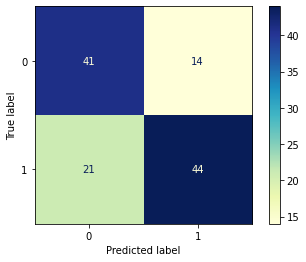

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions), display_labels=modelLR.classes_).plot(cmap='YlGnBu')

Podemos utilizar el informe de clasificación incorporado en Scikit-learn, que devuelve [precisión, cobertura,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), y una columna de soporte (que significa cuántos casos apoyaron esa clasificación). Consulta los enlaces para obtener información más detallada sobre cada una de estas métricas y la figura siguiente:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

** 4. Muestra el informe de clasificación utilizando Scikit-learn. **

In [45]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        55
           1       0.76      0.68      0.72        65

    accuracy                           0.71       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.71      0.71      0.71       120



Salida esperada:

![Captura%20de%20pantalla%202021-01-28%20a%20las%2012.57.31.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2012.57.31.png)

Por último, y para comprender mejor cómo nuestro modelo realiza estas predicciones, podemos utilizar los coeficientes de cada característica (token) para determinar su peso en términos de positividad y negatividad.

In [48]:
# Obtener los nombres de las catacterísticas (tokens)
feature_names = np.array(bow_transformer.get_feature_names())

# Ordenar los coeficientes del modelo
sorted_coef_index = modelLR.coef_[0].argsort()

# Mostrar los coeficientes mayores y menores
print(f'Coeficientes menores: {feature_names[sorted_coef_index[:10]]}')
print(f'Coeficientes mayores: {feature_names[sorted_coef_index[:-11:-1]]}')

Coeficientes menores: ['problem' 'seem' 'return' 'bad' 'say' 'product' 'work' 'batteri' 'noth'
 'vtech']
Coeficientes mayores: ['great' 'best' 'featur' 'set' 'fantast' 'read' 'thing' 'handset' 'clad'
 'life']


Ordenando los diez coeficientes más pequeños y los diez más grandes, podemos ver que el modelo ha predicho palabras como 'problem', 'seem' y 'return' en opiniones negativas, y palabras como 'great', 'best', and 'featur' en reseñas positivas.

Sin embargo, nuestro modelo puede ser mejorado, así que vamos a probar otro tipo de vectorización.

## B. Term frequency–inverse document frequency (TF-IDF)

### Qué es TF-IDF?
TF-IDF son las siglas de *term frequency-inverse document frequency*, y el peso tf-idf es un peso que se utiliza a menudo en la recuperación de información y la minería de textos. Este peso es una medida estadística utilizada para evaluar la importancia de una palabra (token) en un documento de una colección o corpus. La importancia aumenta proporcionalmente al número de veces que un token aparece en el documento, pero se compensa con la frecuencia del token en el corpus. Los motores de búsqueda suelen utilizar variaciones del esquema de ponderación tf-idf como herramienta central para puntuar y clasificar la relevancia de un documento a partir de una consulta del usuario. Una de las funciones de ranking más sencillas se calcula sumando el tf-idf para cada término de la consulta; muchas funciones de ranking más sofisticadas son variantes de este modelo sencillo.

Normalmente, la ponderación tf-idf se compone de dos términos: el primero calcula la Frecuencia de Términos (TF) normalizada, es decir, el número de veces que aparece un término en un documento, dividido por el número total de términos en ese documento; el segundo término es la Frecuencia Inversa de Documentos (IDF), calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico.

**TF: Term Frequency**, que mide la frecuencia con la que un término aparece en un documento. Dado que cada documento tiene una longitud diferente, es posible que un término aparezca mucho más veces en los documentos largos que en los más cortos. Por ello, la frecuencia de términos suele dividirse por la longitud del documento (es decir, el número total de términos en el documento) como forma de normalización: 

*TF(t) = (Número de veces que el término t aparece en un documento) / (Número total de términos en el documento).*

**IDF: Inverse Document Frequency**, que mide la importancia de un término. Al calcular TF, todos los términos se consideran igualmente importantes. Sin embargo, se sabe que algunos términos, como "is", "that" y "of", pueden aparecer muchas veces pero tienen poca importancia. Por lo tanto, hay que ponderar los términos frecuentes y aumentar los raros, calculando lo siguiente 

*IDF(t) = log_e(Número total de documentos / Número de documentos con el término t).*

Vea a continuación un ejemplo sencillo.

**Ejemplo**

Consideremos un documento que contiene 100 términos en los que el término *cat* aparece 3 veces. 

La frecuencia de términos (es decir, tf) para *cat* es entonces (3 / 100) = 0,03. Ahora, supongamos que tenemos 10 millones de documentos y que el token *cat* aparece en mil de ellos. Entonces, la frecuencia inversa del documento (es decir, idf) se calcula como log(10.000.000 / 1.000) = 4. Así, el peso tf-idf es el producto de estas cantidades: 0.03 * 4 = 0.12.
____

Vamos a ver cómo podemos hacer esto en Scikit-learn.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

El modelo TF-IDF es implementado usando la función `TfidfVectorizer` de Scikit-learn.

In [53]:
tfidf_transformer = TfidfVectorizer()

**5. Genera el vocabulario a partir de los datos de entrenamiento utilizando la función *fit* de la misma manera que hicimos para el modelo BoW.**

In [55]:
tfidf_transformer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Resultado esperado (puede variar dependiendo de la versión de Scikit-learn):

![Captura%20de%20pantalla%202021-01-28%20a%20las%2013.01.29.png](attachment:Captura%20de%20pantalla%202021-01-28%20a%20las%2013.01.29.png)

Como se puede ver a continuación, el vocabulario es el mismo, independientemente del método de vectorización de los documentos.

In [56]:
print(f'Hay {len(tfidf_transformer.get_feature_names())} tokens en el vocabulario:')
print(tfidf_transformer.get_feature_names())

Hay 10452 tokens en el vocabulario:
['00', '000', '007', '00pm', '01', '02', '024', '0271', '0273', '0298', '03', '033', '0359', '0380', '0395', '04', '0409', '0412', '0441', '0462', '05', '0547', '0551', '0555', '06ghz', '0735', '0917', '0984', '0gb', '0ghz', '0in', '0l', '0t213e6fmay', '10', '100', '1000', '10000', '100base', '100m', '100mhz', '100x', '1024', '104', '106th', '10base', '10gb', '10k', '10pm', '10th', '10x', '11', '110', '1185', '11b', '11g', '11th', '12', '120', '1200', '1200nf', '120gig', '120mb', '125', '128', '128mb', '1299', '12a', '12th', '12x', '13', '130', '1300', '130w', '1313', '133', '135', '1394', '14', '140', '1400', '144', '1440x900', '145lb', '147', '1493', '15', '150', '1500', '155', '15mph', '16', '160', '1600', '1600x1200', '160gb', '165', '1656', '166', '168', '169', '16k', '16x', '16x9', '17', '170', '1700', '1703fp', '171', '17120', '172', '1743', '175', '1799', '17in', '18', '180', '180w', '181', '1814', '1818', '185', '186', '187', '1870', '1876',

**6. Utiliza la función *transform* en el objeto transformado TF-IDF y transforma todo el conjunto de train.**

In [57]:
X_train_tfidf = tfidf_transformer.transform(X_train)

Podemos ver a continuación cómo el peso del token "01" en la opinión 1 ha cambiado de 1 en el modelo BoW (apareció una vez en el documento) a 0,040001 como resultado del cálculo de tf-idf.

In [58]:
pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

,00,000,007,00pm,01,02,024,0271,0273,0298,03,033,0359,0380,0395,04,0409,0412,0441,0462,05,0547,0551,0555,06ghz,0735,0917,0984,0gb,0ghz,0in,0l,0t213e6fmay,10,100,1000,10000,100base,100m,100mhz,...,youngn,youngster,your,yours,yourself,youth,yr,yuck,yugo,yuletid,yuppi,z28,zap,zd7000,zd7020,zd7040,zd70xx,zealand,zekey,zero,zetec,zimmer,zino,zion,zip,ziplock,zippi,zit,zombi,zone,zoo,zooey,zoom,zr,zucchini,zwick,zwigoff,zx3,zy,über
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059588,0.042141,0.0,0.074118,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074118,0.074118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.032916,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031073,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.063487,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Entrenar el modelo

Vamos a entrenar nuestro modelo utilizando el clasificador de regresión logística definido anteriormente.

In [59]:
modelLR.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluación del modelo

**7. Calcula el rendimiento del modelo en el conjunto de test. Para ello, transforma el conjunto de test a su matriz TF-IDF utilizando el vectorizador aprendido en el entrenamiento y, a continuación, aplica el modelo entrenado utilizando el método de predicción.**

In [60]:
X_test_tfidf = tfidf_transformer.transform(X_test)

In [61]:
predictions = modelLR.predict(X_test_tfidf)

Creemos la matriz de confusión utilizando estas predicciones y el conjunto de y_test e imprimamos el informe de clasificación utilizando Scikit-learn.

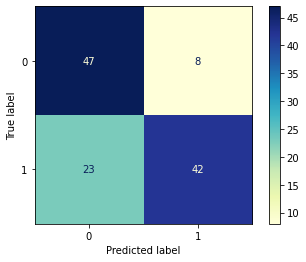

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions), display_labels=modelLR.classes_).plot(cmap='YlGnBu')

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        55
           1       0.84      0.65      0.73        65

    accuracy                           0.74       120
   macro avg       0.76      0.75      0.74       120
weighted avg       0.76      0.74      0.74       120



Por último, veamos el peso de cada característica (un token) en términos de positividad y negatividad.

In [64]:
# Obtener los nombres de las catacterísticas (tokens)
feature_names = np.array(bow_transformer.get_feature_names())

# Ordenar los coeficientes del modelo
sorted_coef_index = modelLR.coef_[0].argsort()

# Mostrar los coeficientes mayores y menores
print(f'Coeficientes menores: {feature_names[sorted_coef_index[:10]]}')
print(f'Coeficientes mayores: {feature_names[sorted_coef_index[:-11:-1]]}')

Coeficientes menores: ['dell' 'tauru' 'problem' 'qualiti' 'calphalon' 'hotel' 'poor' 'return'
 'seuss' 'product']
Coeficientes mayores: ['clad' 'system' 'stephani' 'film' 'great' 'featur' 'all' 'santa'
 'stainless' 'set']


Podemos ver cómo las palabras predichas por el sistema como pertenecientes a cada clase difieren un poco de las predichas en el modelo BoW. Otras siguen siendo las mismas, como "problem" en el caso de las opiniones negativas y "great" en el caso de las positivas.

## Magnífico trabajo!

Parece que el modelo TF-IDF funciona un poco mejor. 

Sin embargo, todavía se puede jugar mucho más. Algunas otras cosas que se pueden probar son perfeccionar el preprocesamiento eliminando los símbolos que no aportan información y que no se han eliminado correctamente (por ejemplo, como se ha visto en algunos documentos, las comillas no parecen haberse eliminado correctamente), utilizar el lematizador en lugar del stemming, probar otros algoritmos de clasificación, tunear los parámetros de los algoritmos, etc.

_Código adaptado del curso NLP with Python impartido por Jose Portilla (Udemy): https://www.udemy.com/course/nlp-natural-language-processing-with-python/ y el programa de especialización en NLP (Coursera): https://www.coursera.org/specializations/natural-language-processing_